### Script for running Machine-Learning models for Detecting Hot Spots

#### Requirements
* pandas
* pycaret

In [1]:
import pandas as pd

import pycaret
import pycaret.classification as cl

import os

#### Settings 

In [2]:
INDATA = r'../data_ground_truth/GTv3_extracted_27Bands.csv'
DROPCOLS = ['system:index', '.geo']
LABEL = 'L4'

#### Data Loading 

In [3]:
os.path.exists(INDATA)

True

In [4]:
df = pd.read_csv(INDATA).drop(columns=DROPCOLS)

In [5]:
df.columns

Index(['DEM_slope', 'L4', 'NDMI_max', 'NDMI_mean', 'NDMI_min', 'NDMI_slope',
       'NDMI_stdDev', 'NDVI_max', 'NDVI_mean', 'NDVI_min', 'NDVI_slope',
       'NDVI_stdDev', 'Relative_elevation_100', 'TCB_max', 'TCB_mean',
       'TCB_min', 'TCB_slope', 'TCB_stdDev', 'TCG_max', 'TCG_mean', 'TCG_min',
       'TCG_slope', 'TCG_stdDev', 'TCW_max', 'TCW_mean', 'TCW_min',
       'TCW_slope', 'TCW_stdDev'],
      dtype='object')

## Data Analysis 

#### Data Splitting 

In [21]:
data_train = df.sample(frac=0.90, random_state=786).reset_index(drop=True)
data_val = df.drop(data_train.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data_train.shape))
print('Unseen Data For Predictions ' + str(data_val.shape))

Data for Modeling: (1129, 28)
Unseen Data For Predictions (125, 28)


#### Data definition and preprocessing 

In [23]:
exp_clf102 = cl.setup(data = data_train, target = 'L4', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                   profile=True
                  ) 

In [25]:
cl.compare_models(sort='F1')

### Model Tuning 

#### ExtraTrees
0 	Extra Trees Classifier 	0.951900 	0.000000 	0.923400 	0.956900 	0.950600 	0.939200

In [26]:
tuned_et = cl.tune_model('et', fold=10, round=4, optimize='F1')

Accuracy  AUC  Recall   Prec.      F1   Kappa
0       0.9494  0.0  0.9385  0.9564  0.9481  0.9356
1       0.9620  0.0  0.9357  0.9641  0.9613  0.9522
2       0.9494  0.0  0.9357  0.9526  0.9488  0.9363
3       0.9620  0.0  0.9643  0.9661  0.9604  0.9520
4       0.9494  0.0  0.9000  0.9585  0.9494  0.9362
5       0.9620  0.0  0.9476  0.9638  0.9618  0.9521
6       0.8987  0.0  0.7842  0.9077  0.8926  0.8711
7       0.9747  0.0  0.9780  0.9766  0.9741  0.9679
8       0.9494  0.0  0.9304  0.9565  0.9491  0.9361
9       0.9241  0.0  0.8623  0.9300  0.9215  0.9040
Mean    0.9481  0.0  0.9177  0.9532  0.9467  0.9344
SD      0.0208  0.0  0.0540  0.0190  0.0223  0.0265

#### Cat Boost
1 	CatBoost Classifier 	0.951900 	0.000000 	0.930600 	0.956500 	0.950300 	0.939200

In [27]:
tuned_cb = cl.tune_model('catboost', fold=10, round=4, optimize='F1')

Accuracy  AUC  Recall   Prec.      F1   Kappa
0       0.9620  0.0  0.9670  0.9661  0.9606  0.9519
1       0.9747  0.0  0.9833  0.9747  0.9747  0.9682
2       0.9620  0.0  0.9476  0.9664  0.9614  0.9522
3       0.9620  0.0  0.9643  0.9661  0.9604  0.9520
4       0.9620  0.0  0.9119  0.9702  0.9621  0.9524
5       0.9747  0.0  0.9833  0.9747  0.9747  0.9681
6       0.9747  0.0  0.9048  0.9777  0.9692  0.9679
7       0.9620  0.0  0.9723  0.9619  0.9616  0.9520
8       0.9367  0.0  0.9300  0.9433  0.9373  0.9207
9       0.9494  0.0  0.8842  0.9523  0.9475  0.9363
Mean    0.9620  0.0  0.9449  0.9653  0.9609  0.9522
SD      0.0113  0.0  0.0334  0.0101  0.0109  0.0141

#### Extreme Gradient Boosting

2 	Extreme Gradient Boosting 	0.946800 	0.000000 	0.925500 	0.950300 	0.945200 	0.932900

In [28]:
tuned_xgb = cl.tune_model('xgboost', fold=10, round=4, optimize='F1')

Accuracy  AUC  Recall   Prec.      F1   Kappa
0       0.9620  0.0  0.9670  0.9661  0.9606  0.9519
1       0.9747  0.0  0.9780  0.9766  0.9741  0.9680
2       0.9494  0.0  0.9119  0.9560  0.9484  0.9360
3       0.9620  0.0  0.9643  0.9661  0.9604  0.9520
4       0.9620  0.0  0.9119  0.9702  0.9621  0.9524
5       0.9494  0.0  0.9613  0.9499  0.9482  0.9359
6       0.9494  0.0  0.8881  0.9529  0.9441  0.9359
7       0.9494  0.0  0.9666  0.9494  0.9494  0.9362
8       0.9367  0.0  0.9300  0.9439  0.9377  0.9208
9       0.8987  0.0  0.8102  0.9070  0.8940  0.8719
Mean    0.9494  0.0  0.9289  0.9538  0.9479  0.9361
SD      0.0196  0.0  0.0489  0.0185  0.0206  0.0248

### Plot model params and calibrate 

#### Calibrate model 

In [36]:
#calibrated_cb = calibrate_model(tuned_cb)

#### Visualize Outputs 

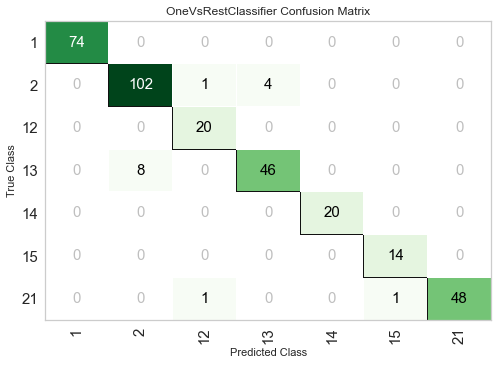

In [37]:
cl.plot_model(tuned_cb, plot='confusion_matrix')

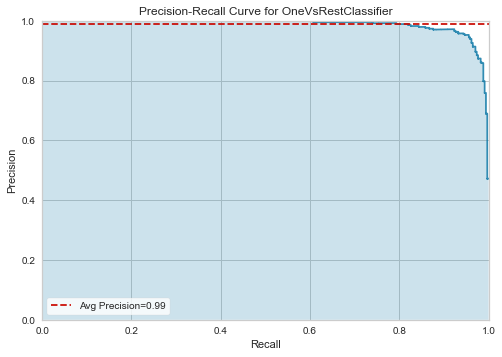

In [38]:
cl.plot_model(tuned_cb, plot='pr')

### Finalize model

In [39]:
final_cb = cl.finalize_model(tuned_cb)

### Save model

In [40]:
cl.save_experiment('../models/2020-10-30_catBoost_tuned')

Experiment Succesfully Saved


In [45]:
cl.save_model(final_cb, '../models/2020-10-30_catBoost_tuned_model')

Transformation Pipeline and Model Succesfully Saved


### Evaluate Predictions 

In [47]:
from sklearn import metrics

In [48]:
metrics.confusion_matrix(data_val['L4'], cl.predict_model(final_cb, data_val)['L4'])

array([[125]], dtype=int64)